# Training a Simple Neural Network from scratch

In [42]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = [14, 5] #Setting plot figure size

In [68]:
#Input array
X=np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1],[1,1,1,1]])
# print(X)

#Output
y=np.array([[1],[1],[0],[0]])

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=10000 #Setting training iterations
lr=0.1 #Setting learning rate
inputlayer_neurons = X.shape[1] #number of features in data set
hiddenlayer_neurons = 4 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer

def train(X=X, y=y, epoch=epoch, lr=lr):
    #weight and bias initialization - using random numbers
    wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
    bh=np.random.uniform(size=(1,hiddenlayer_neurons))
    wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
    bout=np.random.uniform(size=(1,output_neurons))

    for i in range(epoch):
        #Forward Propogation
        hidden_layer_input1=np.dot(X,wh)
        hidden_layer_input=hidden_layer_input1 + bh
        hiddenlayer_activations = sigmoid(hidden_layer_input)
        output_layer_input1=np.dot(hiddenlayer_activations,wout)
        output_layer_input= output_layer_input1+ bout
        output = sigmoid(output_layer_input)

        #Back Propagation
        E = y-output
        slope_output_layer = derivatives_sigmoid(output)
        slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
        d_output = E * slope_output_layer
        Error_at_hidden_layer = d_output.dot(wout.T)
        d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
        wout += hiddenlayer_activations.T.dot(d_output) *lr
        bout += np.sum(d_output, axis=0,keepdims=True) *lr
        wh += X.T.dot(d_hiddenlayer) *lr
        bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
        
    return wh, bh, np.linalg.norm(y-output)
        
#         return np.linalg.norm(y-output)

#     if i == epoch-1:
#         print('Weights: \n', wh)
#         print('\nBiases: \n', bh)

# print('\n\n',np.linalg.norm(y-output))

## Testing and comparing error with various learning rate

In [81]:
xv = np.arange(0.5,25,1)
yv = []
for i in xv:
    yv.append(train(X=X, y=y, epoch=epoch, lr=i)[2])

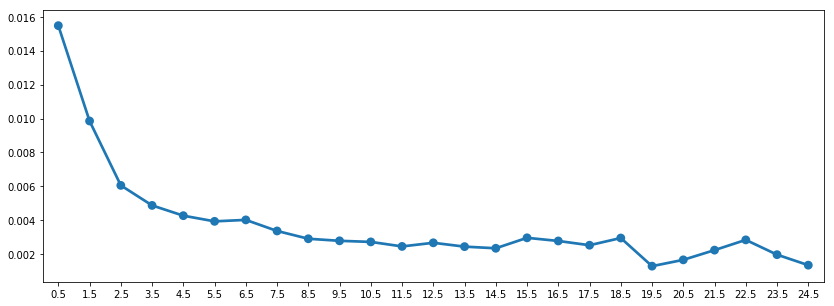

In [79]:
sns.pointplot(x=xv, y=yv)

In [71]:
weights, bias, error = train(X=X, y=y, epoch=epoch, lr=lr)

In [72]:
print('Weights: \n{}\n\nBiases: \n{}\n\nError: \n{}\n\n'.format(weights, bias, error))

Weights: 
[[-0.80257273  0.81314571 -0.31988996  1.65405659]
 [ 2.34221028  0.08735546  1.33670432 -4.52349044]
 [-0.06573005  0.6320357  -0.56131083  1.23242037]
 [ 0.11476781  1.00307469  0.92135373 -0.9217325 ]]

Biases: 
[[-0.3051733   0.0460941  -0.29785213  0.21552976]]

Error: 
0.03897948146708632


